Частина 1: Завантаження та первинний огляд

In [56]:
!git clone https://github.com/Godod/pandas-workshop

Cloning into 'pandas-workshop'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 2), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 53.84 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [57]:
!unzip ./pandas-workshop/work/e-commerce-customer-behavior-dataset.zip -d .

Archive:  ./pandas-workshop/work/e-commerce-customer-behavior-dataset.zip
  inflating: ./E-commerce Customer Behavior - Sheet1.csv  


In [58]:
# 1. Імпортуйте бібліотеку Pandas.
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [59]:
# 2. Завантажте дані з папки work в DataFrame df.
path = './E-commerce Customer Behavior - Sheet1.csv'
df = pd.read_csv(path, encoding='latin-1')

In [60]:
# 3. Проведіть первинний огляд даних:
# 3.1 Виведіть перші 5 рядків (.head()).
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.70,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.00,True,55,Unsatisfied


In [61]:
# 3.2 Перевірте розмір DataFrame (.shape).
df.shape

(350, 11)

In [62]:
# 3.3 Вивчіть інформацію про стовпці, їх типи та наявність пропущених значень (.info()).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [63]:
# 3.4 Отримайте базові статистичні показники для числових стовпців (.describe()).
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.00,350.00,350.00,350.00,350.00,350.00
mean,275.50,33.60,845.38,12.60,4.02,26.59
std,101.18,4.87,362.06,4.16,0.58,13.44
min,101.00,26.00,410.80,7.00,3.00,9.00
25%,188.25,30.00,502.00,9.00,3.50,15.00
50%,275.50,32.50,775.20,12.00,4.10,23.00
75%,362.75,37.00,1160.60,15.00,4.50,38.00
max,450.00,43.00,1520.10,21.00,4.90,63.00


In [64]:
# 4.1 Обговорення в команді: Дайте відповіді на питання:
# 4.2 Чи є в даних пропущені значення?
# ["Days Since Last"]

# 4.3 Чи всі стовпці мають коректний тип даних?
# так

# 4.4 Які перші спостереження ви можете зробити, дивлячись на .describe() (наприклад, середній вік клієнтів, середні витрати)?
# Середній вік клієнтів = 33.60 роки, з відхиленням 4.87 років. Середні витрати: 845.38

In [65]:
# Частина 2: Підготовка даних та створення нових ознак
# 2.1 Створення метрики "Вартість однієї покупки". Часто важлива не тільки загальна сума витрат, але й середня вартість одного товару.
# Створіть новий стовпець Avg Spend per Item, поділивши Total Spend на Items Purchased.
# Перевірте, чи не виникає ділення на нуль. Якщо так, обробіть цей випадок.


def calc_avg_spend_per_item(row:pd.Series) -> float:

  if(row['Items Purchased']==0):
    return 0.0

  avg_spend_per_item:float = row['Total Spend']/row['Items Purchased']
  return avg_spend_per_item

df['Avg Spend per Item'] = df.apply(calc_avg_spend_per_item, axis = 1)
df.describe()


,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Avg Spend per Item
count,350.00,350.00,350.00,350.00,350.00,350.00,350.00
mean,275.50,33.60,845.38,12.60,4.02,26.59,65.23
std,101.18,4.87,362.06,4.16,0.58,13.44,9.00
min,101.00,26.00,410.80,7.00,3.00,9.00,49.52
25%,188.25,30.00,502.00,9.00,3.50,15.00,57.37
50%,275.50,32.50,775.20,12.00,4.10,23.00,67.03
75%,362.75,37.00,1160.60,15.00,4.50,38.00,73.03
max,450.00,43.00,1520.10,21.00,4.90,63.00,83.59


In [66]:
# 2.2 Створення сегментів за активністю. Клієнтів часто ділять на активних та тих, хто давно не робив покупок.
# Створіть стовпець Activity Status. Якщо Days Since Last Purchase менше 30, присвойте значення 'Active', інакше — 'Inactive'.
# Підказка: Для цього зручно використовувати функцію apply з lambda-виразом.

df['Activity Status'] = df['Days Since Last Purchase'].apply(
    lambda x: 'Active' if x < 30 else 'Inactive'
)
df.head(5)


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item,Activity Status
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied,80.01,Active
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral,70.95,Active
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied,56.75,Inactive
3,104,Male,30,San Francisco,Gold,1480.30,19,4.70,False,12,Satisfied,77.91,Active
4,105,Male,27,Miami,Silver,720.40,13,4.00,True,55,Unsatisfied,55.42,Inactive


In [67]:
# 2.3 Перевірка: Виведіть перші 5 рядків оновленого DataFrame з новими стовпцями, щоб переконатися, що все розраховано правильно.
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item,Activity Status
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied,80.01,Active
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral,70.95,Active
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied,56.75,Inactive
3,104,Male,30,San Francisco,Gold,1480.30,19,4.70,False,12,Satisfied,77.91,Active
4,105,Male,27,Miami,Silver,720.40,13,4.00,True,55,Unsatisfied,55.42,Inactive


In [68]:
# Частина 3: Дослідницький аналіз

# 3.1
# Питання 1: Який тип членства є найціннішим для компанії?
# Згрупуйте дані за Membership Type.
# Для кожного типу розрахуйте середні Total Spend, Items Purchased та Average Rating.
# Відсортуйте результат за середніми витратами.

membership_type_analysis = df.groupby("Membership Type").agg(
    {
        "Total Spend" : "mean",
        "Items Purchased" : "mean",
        "Average Rating" : "mean"
    }
)

membership_type_analysis = membership_type_analysis.sort_values(by="Total Spend", ascending=False)
membership_type_analysis.head()

,Total Spend,Items Purchased,Average Rating
Membership Type,,,
Gold,1311.14,17.62,4.68
Silver,748.43,11.66,4.05
Bronze,473.39,8.49,3.32


In [69]:
# Висновок: У текстовій комірці напишіть, який тип членства приносить найбільше доходу і є найбільш задоволеним.
print(f"Тип членства приносить найбільше доходу: {membership_type_analysis.index[0]}")
print(f"І є найбільш задоволеним: {membership_type_analysis['Total Spend'].iloc[0]:.2f}")



Тип членства приносить найбільше доходу: Gold
І є найбільш задоволеним: 1311.14


In [70]:
# 3.2 Питання 2: Як знижки впливають на поведінку клієнтів?

# Згрупуйте дані за стовпцем Discount Applied (True/False).
# Порівняйте середні Total Spend та Items Purchased для клієнтів, які використовували знижку, і тих, хто ні.
# Висновок: Чи дійсно клієнти зі знижками витрачають більше? Чи купують вони більше товарів?

discount_analysis = df.groupby("Discount Applied").agg(
    {
        "Total Spend" : "mean",
        "Items Purchased" : "mean",
        "Average Rating" : "mean"
    }
)

discount_analysis.head()

,Total Spend,Items Purchased,Average Rating
Discount Applied,,,
False,903.49,13.07,4.06
True,787.27,12.13,3.98


In [71]:
# Висновок: Чи дійсно клієнти зі знижками витрачають більше? Чи купують вони більше товарів?
total_spend_with_discount = discount_analysis.loc[False, 'Total Spend']
total_spend_without_discount = discount_analysis.loc[True, 'Total Spend']
spend_diff = total_spend_with_discount - total_spend_without_discount

print(f"Клієнти зі знижкою витрачають: {total_spend_with_discount:.2f}")
print(f"Клієнти без знижки витрачають: {total_spend_without_discount:.2f}")
print(f"Клієнти зі знижкою витрачають більше на {spend_diff:.2f}")

Клієнти зі знижкою витрачають: 903.49
Клієнти без знижки витрачають: 787.27
Клієнти зі знижкою витрачають більше на 116.22


In [72]:
# 3.3 Питання 3: Які вікові групи є найбільш активними та платоспроможними?
# Знайдіть 5 наймолодших та 5 найстарших клієнтів у датасеті.
# Порівняйте їхні середні витрати (Total Spend) та активність (Days Since Last Purchase).
# Висновок: Чи є помітна різниця в купівельній поведінці між різними поколіннями?

# Знайдіть 5 наймолодших
youngest_df = df.nsmallest(5, 'Age')

# Знайдіть 5 найстарших
oldest_df = df.nlargest(5, 'Age')

In [73]:
young_avg_mean = youngest_df[['Total Spend', 'Days Since Last Purchase']].mean()
oldest_avg_mean = oldest_df[['Total Spend', 'Days Since Last Purchase']].mean()
age_mean_diff =  (young_avg_mean['Total Spend'] - oldest_avg_mean['Total Spend'])

print(f"Середні витрати молодих: {young_avg_mean['Total Spend']:.2f}")
print(f"Середні витрати старших: {oldest_avg_mean['Total Spend']:.2f}")
print(f"Молодші витрачають більше на {age_mean_diff:.2f}")

Середні витрати молодих: 692.60
Середні витрати старших: 504.75
Молодші витрачають більше на 187.85


In [74]:
df.head(5)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,Avg Spend per Item,Activity Status
0,101,Female,29,New York,Gold,1120.20,14,4.60,True,25,Satisfied,80.01,Active
1,102,Male,34,Los Angeles,Silver,780.50,11,4.10,False,18,Neutral,70.95,Active
2,103,Female,43,Chicago,Bronze,510.75,9,3.40,True,42,Unsatisfied,56.75,Inactive
3,104,Male,30,San Francisco,Gold,1480.30,19,4.70,False,12,Satisfied,77.91,Active
4,105,Male,27,Miami,Silver,720.40,13,4.00,True,55,Unsatisfied,55.42,Inactive


In [75]:
# Питання 4: Чи дійсно жінки з Gold-членством мають вищий рівень задоволеності, ніж чоловіки з тим же статусом?

# 3.1
# Виберіть всіх членів з Gold статусом та згрупуйте їх у по рівні задоволеності (Satisfaction Level) та гендеру (Gender)
gold_membership_df= df[df['Membership Type']=='Gold']

gold_grouped = gold_membership_df.groupby(['Satisfaction Level','Gender']).size()

# 3.2
# Розрахуйте відсоток для жінок і для чоловіків і порівняйте їх.
male_count = gold_grouped.loc[('Satisfied', 'Male')]
female_count = gold_grouped.loc[('Satisfied', 'Female')]

total_satisfied = male_count + female_count
female_percent = (female_count / total_satisfied) * 100
male_percent = (male_count / total_satisfied) * 100

# 3.3
# Висновок: Чи дійсно жінки мають вищий рівень задоволеності, ніж чоловіки?
print(f"Чоловіки мають рівень 'Заволення': {male_percent:.2f}, а жінки: {female_percent:.2f}, рівень задоволення майже одинаковий")


Чоловіки мають рівень 'Заволення': 50.43, а жінки: 49.57, рівень задоволення майже одинаковий


<Axes: title={'center': 'DataFrame Plot'}>

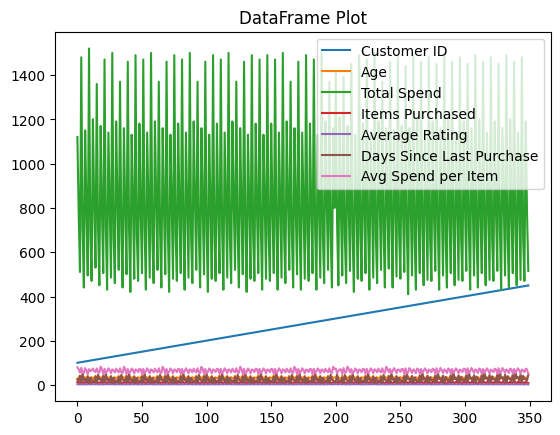

In [76]:
df.plot(title="DataFrame Plot")

<Axes: title={'center': 'Середні витрати по членству'}, xlabel='Membership Type', ylabel='Середні витрати'>

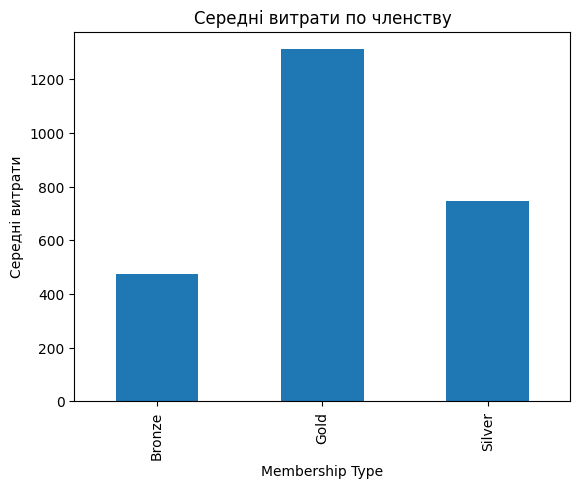

In [77]:
# Частина 4: Візуалізація результатів
# Представте ваші знахідки у вигляді графіків.

# 4.1 Графік 1: Створіть стовпчасту діаграму (bar chart), яка порівнює середні витрати (Total Spend) для кожного Membership Type.
avg_spend_per_membership_type_df = df.groupby('Membership Type')['Total Spend'].mean()
avg_spend_per_membership_type_df.plot(kind='bar', title='Середні витрати по членству', xlabel='Membership Type', ylabel='Середні витрати')

<Axes: title={'center': 'Звʼязок між віком та витратами'}, xlabel='Вік', ylabel='Total Spend'>

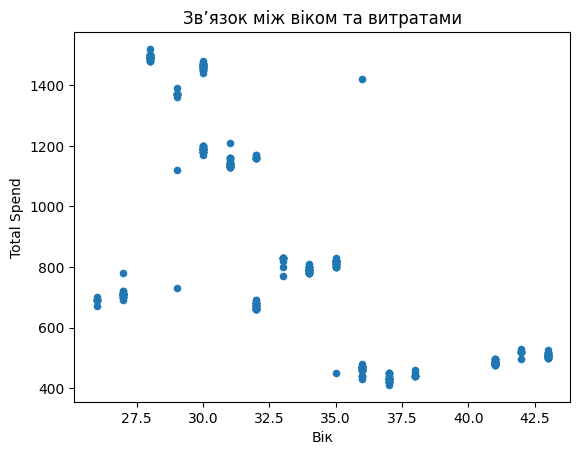

In [78]:

# 4.2 Графік 2: Створіть діаграму розсіювання (scatter plot), щоб візуалізувати зв'язок між віком (Age) та загальними витратами (Total Spend).

df.plot(
    kind='scatter',
    x='Age',
    y='Total Spend',
    title='Звʼязок між віком та витратами',
    xlabel='Вік',
    ylabel='Total Spend'
)
# 4.3 Вимоги: Кожен графік повинен мати інформативний заголовок та підписані осі.


In [79]:
# 5.1 Бонусні завдання (додаткові бали)

# Бонус 1: Розширений аналіз сегментації.
# Створіть новий сегмент клієнтів "VIP", до якого належать клієнти з Membership Type = 'Gold' та Total Spend > середнього по всьому датасету.
# Порівняйте середній рейтинг (Average Rating) та рівень задоволеності (Satisfaction Level) "VIP" клієнтів з усіма іншими.

# Створюємо VIP-сегмент
vip_clients_df = df[
    (df['Membership Type'] == 'Gold') &
    (df['Total Spend'] > df['Total Spend'].mean())
]
non_vip_clients_df = df.drop(vip_clients_df.index)

# Середній рейтинг
vip_avg_rating = vip_clients_df['Average Rating'].mean()
non_vip_avg_rating = non_vip_clients_df['Average Rating'].mean()

# Рівень задоволеності (у відсотках)
vip_satisfaction = vip_clients_df['Satisfaction Level'].value_counts(normalize=True) * 100
non_vip_satisfaction = non_vip_clients_df['Satisfaction Level'].value_counts(normalize=True) * 100

# Вивід результатів
print(f"Середній рейтинг: VIP: {vip_avg_rating:.2f}, Інші: {non_vip_avg_rating:.2f}")
print(f"Рівень задоволеності VIP: {vip_satisfaction.round(2).to_dict()}")
print(f"Рівень задоволеності Інші: {non_vip_satisfaction.round(2).to_dict()}")

Середній рейтинг: VIP: 4.68, Інші: 3.69
Рівень задоволеності VIP: {'Satisfied': 100.0}
Рівень задоволеності Інші: {'Unsatisfied': 50.22, 'Neutral': 46.32, 'Satisfied': 3.46}


In [80]:
# 5.2 Бонус 2: Аналіз кореляцій.
# Створіть кореляційну матрицю для всіх числових стовпців у датасеті.
# У текстовій комірці вкажіть, які дві змінні мають найсильнішу позитивну кореляцію, і поясніть, що це може означати.

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix.round(2))


# Знаходимо найсильнішу позитивну кореляцію (крім 1.0 по діагоналі)
corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
strongest_pair = corr_pairs[corr_pairs < 1.0].idxmax()
strongest_value = corr_pairs[corr_pairs < 1.0].max()

print(f"Найсильніша позитивна кореляція: {strongest_pair[0]} - {strongest_pair[1]} ({strongest_value:.2f})")
print("Більше покупок — більше витрат: найсильніша кореляція між Total Spend і Items Purchased.")
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}")

                          Customer ID   Age  Total Spend  Items Purchased  \
Customer ID                      1.00  0.01        -0.01            -0.00   
Age                              0.01  1.00        -0.68            -0.69   
Total Spend                     -0.01 -0.68         1.00             0.97   
Items Purchased                 -0.00 -0.69         0.97             1.00   
Average Rating                  -0.00 -0.72         0.94             0.92   
Discount Applied                -0.00  0.06        -0.16            -0.11   
Days Since Last Purchase         0.12  0.17        -0.54            -0.42   
Avg Spend per Item              -0.01 -0.55         0.79             0.63   

                          Average Rating  Discount Applied  \
Customer ID                        -0.00             -0.00   
Age                                -0.72              0.06   
Total Spend                         0.94             -0.16   
Items Purchased                     0.92             -0.11

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Avg Spend per Item
Customer ID,1.00,0.01,-0.01,-0.00,-0.00,-0.00,0.12,-0.01
Age,0.01,1.00,-0.68,-0.69,-0.72,0.06,0.17,-0.55
Total Spend,-0.01,-0.68,1.00,0.97,0.94,-0.16,-0.54,0.79
Items Purchased,-0.00,-0.69,0.97,1.00,0.92,-0.11,-0.42,0.63
Average Rating,-0.00,-0.72,0.94,0.92,1.00,-0.07,-0.43,0.77
Discount Applied,-0.00,0.06,-0.16,-0.11,-0.07,1.00,0.76,-0.21
Days Since Last Purchase,0.12,0.17,-0.54,-0.42,-0.43,0.76,1.00,-0.66
Avg Spend per Item,-0.01,-0.55,0.79,0.63,0.77,-0.21,-0.66,1.00
